In [32]:
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import math
import matplotlib.pyplot as plt
all_files = glob.glob('*.csv')

temp = []
for filename in all_files:
    df = pd.concat((pd.read_csv(f) for f in all_files))
    temp.append(df)
frame = pd.concat(temp, axis=0, ignore_index=True)

In [33]:
frame = frame.drop('No', 1)


In [34]:
#fetch train-data and test_data
train_data=frame.loc[frame['year']!=2017 ]
test_data=frame.loc[frame['year']==2017]
test_data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
33648,2017,1,1,0,497.0,580.0,8.0,112.0,6800.0,4.0,-5.3,1018.3,-7.1,0.0,S,0.8,Gucheng
33649,2017,1,1,1,476.0,546.0,7.0,111.0,6800.0,4.0,-5.4,1018.7,-7.1,0.0,S,1.1,Gucheng
33650,2017,1,1,2,475.0,546.0,7.0,114.0,6800.0,4.0,-5.9,1018.8,-7.6,0.0,S,1.5,Gucheng
33651,2017,1,1,3,447.0,509.0,6.0,118.0,6700.0,4.0,-6.5,1018.8,-8.0,0.0,SSE,0.7,Gucheng
33652,2017,1,1,4,432.0,470.0,6.0,115.0,6800.0,3.0,-6.9,1018.1,-8.4,0.0,WSW,0.3,Gucheng
33653,2017,1,1,5,420.0,461.0,6.0,115.0,6800.0,3.0,-6.8,1017.5,-8.3,0.0,S,1.4,Gucheng
33654,2017,1,1,6,410.0,461.0,6.0,119.0,6900.0,3.0,-7.1,1017.6,-8.6,0.0,S,1.3,Gucheng
33655,2017,1,1,7,423.0,481.0,7.0,120.0,6900.0,3.0,-7.5,1018.3,-8.9,0.0,S,0.7,Gucheng
33656,2017,1,1,8,432.0,482.0,6.0,113.0,7000.0,3.0,-8.1,1018.7,-9.6,0.0,NNW,0.5,Gucheng
33657,2017,1,1,9,421.0,477.0,7.0,112.0,7200.0,3.0,-6.3,1019.0,-7.7,0.0,S,0.6,Gucheng


In [66]:
#initialize x and y
x_train_TEMP=np.array(train_data['TEMP'].values)
x_train_PRES=np.array(train_data['PRES'].values)
x_train_DEWP=np.array(train_data['DEWP'].values)
x_train_RAIN=np.array(train_data['RAIN'].values)
x_train_wd=np.array(train_data['wd'].values)
x_train_WSPM=np.array(train_data['WSPM'].values)

x_test_TEMP=np.array(test_data['TEMP'].values)
x_test_PRES=np.array(test_data['PRES'].values)
x_test_DEWP=np.array(test_data['DEWP'].values)
x_test_RAIN=np.array(test_data['RAIN'].values)
x_test_wd=np.array(test_data['wd'].values)
x_test_WSPM=np.array(test_data['WSPM'].values)

y_train=np.array(train_data['PM2.5'].values)
y_test=np.array(test_data['PM2.5'].values)

#multidimentional data
x_train=np.array(train_data[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].values)
x_test=np.array(test_data[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].values)


In [56]:
#this method receives 2 sets, one is the training set one is the label
#this method will train a linear model for 1-d and return it
#eta--the learing rate
def train_simple(X,Y,X_test,Y_test,eta,epochs):
    original=0     #the original weight^2+bias^2
    #set placeholders and variables
    x=tf.placeholder('float')
    y=tf.placeholder('float')
    weight=tf.Variable(np.random.normal())
    bias=tf.Variable(np.random.normal())
    #the prediction with the current model
    result=tf.add(tf.multiply(weight,x),bias)
    loss=tf.reduce_mean(tf.square(result-y))
    optimizer=tf.train.GradientDescentOptimizer(eta).minimize(loss)  #can choose adam if you want
    feed_dict={x:X,y:Y}
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            sess.run(optimizer,feed_dict=feed_dict)
            print('cost:{}'.format(sess.run(loss,feed_dict=feed_dict)))
            print('w:{}'.format(weight.eval()))
            print('b:{}'.format(bias.eval()))
            print()
        print('the final result:')
        print(weight.eval())
        print(bias.eval())
        print('start testing:')
        prediction=sess.run(result,feed_dict={x:X_test})
        return X_test,Y_test,prediction
        
        
        
    
            
        
            

In [61]:
def plot_simple(X,Y,X_test,Y_test,eta,epochs):
    x1,y1=removeNan(X,Y)
    x2,y2=removeNan(X_test,Y_test)
    x,y,pred=train_simple(x1,y1,x2,y2,eta,epochs)
    plt.scatter(x2,y2,c='r',s=1)
    plt.plot(x2,pred,c='g')
    plt.yscale('log')
    plt.show()

In [38]:
# remove all nan's from x and y
#if x(or y) contains nan on index i then remove the the i th element from both lists
def removeNan(X,Y):
    temp1 = np.argwhere(np.isnan(X)).T
    temp2= np.argwhere(np.isnan(Y)).T
    temp=list(set(temp2[0]).union(set(temp1[0])))
    x1=np.delete(X,temp)
    x2=np.delete(Y,temp)
    return x1,x2

def removeNan_str(X,Y):
    temp1 = np.argwhere(pd.isnull(X)).T
    temp2= np.argwhere(np.isnan(Y)).T
    temp=list(set(temp2[0]).union(set(temp1[0])))
    x1=np.delete(X,temp)
    x2=np.delete(Y,temp)
    return x1,x2
    

In [11]:
def run_simple(X,Y):
    x1,y1=removeNan(X,Y)
    train_simple(x1,y1,0.0000001,500)
run_simple(x_train_PRES,y_train)

cost:228979.109375
w:-0.3883510231971741
b:-0.2928158938884735

cost:147320.0
w:-0.29298704862594604
b:-0.2927215099334717

cost:95601.359375
w:-0.21709337830543518
b:-0.2926464080810547

cost:62845.42578125
w:-0.15669476985931396
b:-0.29258662462234497

cost:42099.51953125
w:-0.10862764716148376
b:-0.2925390601158142

cost:28960.134765625
w:-0.07037429511547089
b:-0.29250121116638184

cost:20638.326171875
w:-0.03993105888366699
b:-0.2924710810184479

cost:15367.7216796875
w:-0.015703365206718445
b:-0.2924470901489258

cost:12029.5947265625
w:0.003577806055545807
b:-0.29242801666259766

cost:9915.3984375
w:0.01892237737774849
b:-0.29241281747817993

cost:8576.375
w:0.031134074553847313
b:-0.2924007475376129

cost:7728.30615234375
w:0.04085253179073334
b:-0.2923911213874817

cost:7191.18408203125
w:0.04858678951859474
b:-0.29238346219062805

cost:6850.99853515625
w:0.054741960018873215
b:-0.29237738251686096

cost:6635.5419921875
w:0.05964043736457825
b:-0.29237252473831177

cost:6499.0

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752075

cost:6263.36669921875
w:0.07873431593179703
b:-0.2923537492752

KeyboardInterrupt: 

In [12]:
# represent the wind's direction as a number (radius)
#this method receives a set and change everything to a number
def getWindAngle(Z):
    Y=[]
    for direct in Z:
        if pd.isnull(direct):
            Y.append(math.nan)
        elif direct =='SW':
            Y.append(np.radians(225))
        elif direct =='N':
            Y.append(np.radians(0))
        elif direct =='NNW':
            Y.append(np.radians(337.5))
        elif direct =='WNW':
            Y.append(np.radians(292.5))
        elif direct =='WSW':
            Y.append(np.radians(247.5))
        elif direct =='E':
            Y.append(np.radians(90))
        elif direct =='NE':
            Y.append(np.radians(45))
        elif direct =='ENE':
            Y.append(np.radians(67.5))
        elif direct =='ESE':
            Y.append(np.radians(112.5))
        elif direct =='S':
            Y.append(np.radians(180))
        elif direct =='SE':
            Y.append(np.radians(135))
        elif direct =='SSE':
            Y.append(np.radians(157.5))
        elif direct =='SSW':
            Y.append(np.radians(202.5))
        elif direct =='NNE':
            Y.append(np.radians(22.5))
        elif direct =='NW':
            Y.append(np.radians(315.5))
        elif direct =='W':
            Y.append(np.radians(270))
        
    return np.array(Y)
        
            
            
    

In [13]:
#check how many directions
print(set(x_train_wd))

{nan, 'SW', 'NNE', 'N', 'SSW', 'S', 'NW', 'W', 'SSE', 'NE', 'E', 'ESE', 'WSW', 'NNW', 'WNW', 'SE', 'ENE'}


In [77]:
def plot_simple_wind():
    # this step removes all nans in wind and y then change the string in wd to numbers
    global x_train_wd,y_train,x_test_wd,y_test
    wd_new,y_new=removeNan_str(x_train_wd,y_train)
   
    wd_test,y_test=removeNan_str(x_test_wd,y_test)
    wd_test,y_test=wd_test[:min(wd_test.shape[0],y_test.shape[0])],y_test[:min(wd_test.shape[0],y_test.shape[0])]
    wd_new=getWindAngle(wd_new)
    wd_test=getWindAngle(wd_test)
    x,y,pred=train_simple(wd_new,y_new,wd_test,y_test,0.005,150)
    plt.scatter(wd_test,y_test,c='r',s=0.5)
    plt.plot(wd_test,pred,c='g')
    plt.yscale('log')
    plt.show()
    
    

In [15]:
# this simple function serves uniquely for training the wind and y-label
def run_simple_wind():
    train_simple(wd_new,y_new,0.02,500)
run_simple_wind()

cost:9711.3486328125
w:7.713207721710205
b:3.410034656524658

cost:8831.2626953125
w:11.943224906921387
b:5.596253871917725

cost:8544.6884765625
w:14.060338973999023
b:7.231678009033203

cost:8425.3310546875
w:15.060665130615234
b:8.569781303405762

cost:8353.7548828125
w:15.471385955810547
b:9.744787216186523

cost:8296.486328125
w:15.571495056152344
b:10.827803611755371

cost:8244.123046875
w:15.508635520935059
b:11.85653305053711

cost:8194.009765625
w:15.360931396484375
b:12.850998878479004

cost:8145.3828125
w:15.169713020324707
b:13.82186508178711

cost:8098.0078125
w:14.956835746765137
b:14.774842262268066

cost:8051.7978515625
w:14.733853340148926
b:15.713018417358398

cost:8006.71044921875
w:14.506860733032227
b:16.638092041015625

cost:7962.7109375
w:14.279070854187012
b:17.551027297973633

cost:7919.77734375
w:14.052165985107422
b:18.452396392822266

cost:7877.87841796875
w:13.827021598815918
b:19.342565536499023

cost:7836.9912109375
w:13.604084014892578
b:20.2217903137207

cost:6278.9873046875
w:-0.22550734877586365
b:74.60795593261719

cost:6276.701171875
w:-0.2783741354942322
b:74.81584930419922

cost:6274.4697265625
w:-0.33059877157211304
b:75.0212173461914

cost:6272.29150390625
w:-0.38218939304351807
b:75.22409057617188

cost:6270.1669921875
w:-0.4331532418727875
b:75.42449951171875

cost:6268.0927734375
w:-0.48349809646606445
b:75.62247467041016

cost:6266.06884765625
w:-0.5332313776016235
b:75.81804656982422

cost:6264.09375
w:-0.5823609828948975
b:76.01123809814453

cost:6262.16650390625
w:-0.6308932304382324
b:76.20208740234375

cost:6260.28564453125
w:-0.678836464881897
b:76.39061737060547

cost:6258.45166015625
w:-0.7261970639228821
b:76.57685852050781

cost:6256.66015625
w:-0.772982656955719
b:76.7608413696289

cost:6254.91259765625
w:-0.8192005157470703
b:76.94258880615234

cost:6253.20654296875
w:-0.8648571372032166
b:77.12212371826172

cost:6251.5419921875
w:-0.9099589586257935
b:77.29948425292969

cost:6249.9189453125
w:-0.954512953758239

KeyboardInterrupt: 

cost:13429.099609375
w:4.766292572021484
b:0.006627321243286133

cost:13183.5322265625
w:-0.8209099769592285
b:0.6498616933822632

cost:12952.0732421875
w:4.494271755218506
b:1.4615025520324707

cost:12733.6259765625
w:-0.6066799163818359
b:2.098700523376465

cost:12527.1943359375
w:4.244361877441406
b:2.8891491889953613

cost:12331.8603515625
w:-0.41271209716796875
b:3.5198910236358643

cost:12146.791015625
w:4.014665603637695
b:4.290058135986328

cost:11971.2177734375
w:-0.23720979690551758
b:4.913978576660156

cost:11804.4384765625
w:3.803450584411621
b:5.664712905883789

cost:11645.80859375
w:-0.07853364944458008
b:6.281496524810791

cost:11494.7392578125
w:3.6091349124908447
b:7.013589859008789

cost:11350.689453125
w:0.06481146812438965
b:7.622965335845947

cost:11213.1650390625
w:3.430274248123169
b:8.337158203125

cost:11081.7099609375
w:0.19419026374816895
b:8.938895225524902

cost:10955.9072265625
w:3.265549421310425
b:9.635880470275879

cost:10835.3740234375
w:0.310848236083

cost:6636.791015625
w:1.0328409671783447
b:55.2359619140625

cost:6628.177734375
w:1.015946865081787
b:55.44373321533203

cost:6619.7265625
w:1.0255775451660156
b:55.64995574951172

cost:6611.43603515625
w:1.009927749633789
b:55.85381317138672

cost:6603.30078125
w:1.0184926986694336
b:56.056121826171875

cost:6595.32080078125
w:1.0039831399917603
b:56.256141662597656

cost:6587.4912109375
w:1.0115793943405151
b:56.454612731933594

cost:6579.8095703125
w:0.9981149435043335
b:56.65086364746094

cost:6572.27294921875
w:1.0048311948776245
b:56.84557342529297

cost:6564.87939453125
w:0.992324709892273
b:57.038124084472656

cost:6557.625
w:0.9982419013977051
b:57.22914123535156

cost:6550.5078125
w:0.9866141080856323
b:57.41806411743164

cost:6543.525390625
w:0.9918056726455688
b:57.60546112060547

cost:6536.67529296875
w:0.9809840321540833
b:57.79082107543945

cost:6529.95458984375
w:0.9855173230171204
b:57.974666595458984

cost:6523.36083984375
w:0.9754354357719421
b:58.156532287597656

c

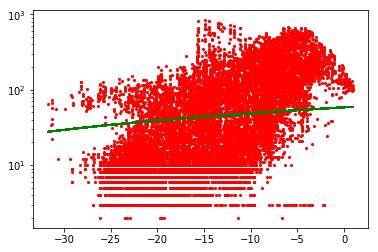

In [62]:
#this part is for part one except wind
plot_simple(x_train_DEWP,y_train,x_test_DEWP,y_test,0.005,150)

/Users/lingjun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  app.launch_new_instance()


cost:11729.1650390625
w:1.7835936546325684
b:0.8169131278991699

cost:11026.87890625
w:3.568650245666504
b:1.5517780780792236

cost:10476.978515625
w:5.135936737060547
b:2.2304117679595947

cost:10045.7197265625
w:6.511105537414551
b:2.859339714050293

cost:9706.8427734375
w:7.716789722442627
b:3.4443202018737793

cost:9439.9052734375
w:8.772958755493164
b:3.990434169769287

cost:9228.9853515625
w:9.69723129272461
b:4.502164363861084

cost:9061.6982421875
w:10.505152702331543
b:4.983466625213623

cost:8928.3935546875
w:11.21043872833252
b:5.437831401824951

cost:8821.560546875
w:11.825191497802734
b:5.868338584899902

cost:8735.3564453125
w:12.360088348388672
b:6.277706146240234

cost:8665.228515625
w:12.824549674987793
b:6.668332099914551

cost:8607.634765625
w:13.226887702941895
b:7.042332649230957

cost:8559.81640625
w:13.57443618774414
b:7.401575565338135

cost:8519.623046875
w:13.873665809631348
b:7.747708320617676

cost:8485.390625
w:14.130285263061523
b:8.082185745239258

cost:8

cost:7291.63427734375
w:10.305421829223633
b:33.196258544921875

cost:7284.9208984375
w:10.260231971740723
b:33.373966217041016

cost:7278.2470703125
w:10.215178489685059
b:33.55113220214844

cost:7271.61328125
w:10.170262336730957
b:33.727760314941406

cost:7265.021484375
w:10.125482559204102
b:33.90385437011719

cost:7258.46923828125
w:10.080838203430176
b:34.079410552978516

cost:7251.9560546875
w:10.036330223083496
b:34.25443649291992

cost:7245.482421875
w:9.99195671081543
b:34.42892837524414

cost:7239.0478515625
w:9.947718620300293
b:34.6028938293457

cost:7232.65283203125
w:9.903614044189453
b:34.776329040527344

cost:7226.29638671875
w:9.859643936157227
b:34.94923782348633

cost:7219.97802734375
w:9.815807342529297
b:35.121620178222656

cost:7213.69873046875
w:9.772103309631348
b:35.293479919433594

cost:7207.45751953125
w:9.728531837463379
b:35.46481704711914

cost:7201.25341796875
w:9.68509292602539
b:35.63563537597656

cost:7195.0869140625
w:9.641785621643066
b:35.805934906

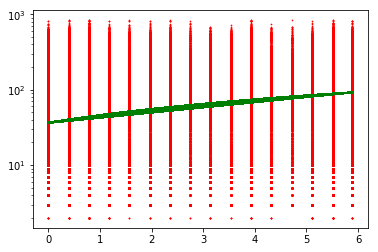

In [78]:
# this part is for part 1 wind
plot_simple_wind()

In [76]:
 print(wd_test.shape, y_test.shape)

(195564,) (185761,)
